In [ ]:
# Ivan Christopher - C14190193

In [ ]:
import tensorflow as tf   # Import library
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()    # load dataset gambar
X_train.shape

(50000, 32, 32, 3)

In [ ]:
print("Jumlah Test Image: ", X_test.shape)       # cek jumlah test image

Jumlah Test Image:  (10000, 32, 32, 3)


In [ ]:
y_train.shape      # cek jumlah training image

(50000, 1)

In [ ]:
y_train[:5]     

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

Gambar dan nama dari dataset secara langsung: 



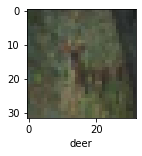

In [ ]:
print("Gambar dan nama dari dataset secara langsung: \n")
plot_image(X_train, y_train, 10)

In [ ]:
X_train = X_train / 255.0      # menormalisasi nilai pixel dari test dan training image antara 0 dan 1
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([                       # artificial neural network
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(300, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8719 - accuracy: 0.3274
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6859 - accuracy: 0.4005
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6066 - accuracy: 0.4302
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5491 - accuracy: 0.4498
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5087 - accuracy: 0.4638


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report    # isi laporan klasifikasi
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Laporan Klasifikasi: \n", classification_report(y_test, y_pred_classes))

Laporan Klasifikasi: 
               precision    recall  f1-score   support

           0       0.48      0.48      0.48      1000
           1       0.54      0.61      0.57      1000
           2       0.30      0.39      0.34      1000
           3       0.36      0.30      0.33      1000
           4       0.47      0.16      0.24      1000
           5       0.42      0.31      0.36      1000
           6       0.38      0.74      0.50      1000
           7       0.61      0.40      0.49      1000
           8       0.44      0.75      0.56      1000
           9       0.71      0.25      0.37      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.42     10000
weighted avg       0.47      0.44      0.42     10000



In [ ]:
cnn = models.Sequential([                                                                     # inisiliasi CNN
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # metode untuk proses CNN

In [ ]:
cnn.fit(X_train, y_train, epochs=10)    # training data gambar

Epoch 1/10
1563/1563 [==============================] - 146s 93ms/step - loss: 1.4135 - accuracy: 0.4921
Epoch 2/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.0475 - accuracy: 0.6336
Epoch 3/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.9082 - accuracy: 0.6866
Epoch 4/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.8158 - accuracy: 0.7160
Epoch 5/10
1563/1563 [==============================] - 145s 92ms/step - loss: 0.7370 - accuracy: 0.7473
Epoch 6/10
1563/1563 [==============================] - 148s 95ms/step - loss: 0.6705 - accuracy: 0.7678
Epoch 7/10
1563/1563 [==============================] - 148s 95ms/step - loss: 0.6129 - accuracy: 0.7867
Epoch 8/10
1563/1563 [==============================] - 148s 94ms/step - loss: 0.5591 - accuracy: 0.8050
Epoch 9/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.5077 - accuracy: 0.8229
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
cnn.evaluate(X_test,y_test)     # hasil evaluasi training data

313/313 [==============================] - 8s 26ms/step - loss: 0.9545 - accuracy: 0.7057


[0.9544531106948853, 0.7056999802589417]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.6186201e-05, 9.5702987e-08, 1.3886677e-04, 9.8713034e-01,
        5.5641958e-05, 3.3225475e-03, 8.8662505e-03, 3.9109730e-04,
        7.6514625e-05, 2.2896786e-06],
       [6.8770753e-08, 1.4700015e-03, 1.5678622e-10, 5.0366582e-11,
        6.8108678e-15, 1.9128608e-10, 3.1961214e-10, 1.7059262e-16,
        9.9852633e-01, 3.6182830e-06],
       [1.4825088e-02, 4.5811636e-03, 1.4944776e-03, 5.1418277e-03,
        4.8999555e-05, 1.6243634e-04, 8.4747327e-05, 5.6863442e-04,
        9.7088271e-01, 2.2099018e-03],
       [9.9464428e-01, 3.0300211e-05, 1.8374457e-04, 2.2655135e-04,
        1.2247593e-04, 7.6877365e-07, 5.8907426e-06, 1.8166771e-05,
        4.4857725e-03, 2.8202758e-04],
       [6.2004540e-07, 6.9898952e-06, 1.4225600e-03, 1.5812142e-02,
        3.8780755e-01, 2.1702941e-03, 5.9275001e-01, 1.5579706e-06,
        2.4223345e-05, 4.0044729e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

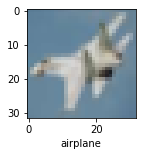

In [ ]:
plot_image(X_test, y_test,10)  # hasil output yang diambil dari dataset secara langsung

In [ ]:
classes[y_classes[10]]        # hasil prediksi

'airplane'